In [8]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [9]:
df = pd.read_csv('BikeRental.csv')

In [10]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: '2011-01-01'

<Figure size 1500x1000 with 0 Axes>

In [15]:
df_copy = df.copy()
df_copy.drop(['instant', 'dteday', 'casual', 'registered','atemp',"workingday",'season'], axis=1, inplace=True)

In [16]:
df_copy.head()

,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,0,6,1,0.24,0.81,0.0,16
1,0,1,1,0,6,1,0.22,0.80,0.0,40
2,0,1,2,0,6,1,0.22,0.80,0.0,32
3,0,1,3,0,6,1,0.24,0.75,0.0,13
4,0,1,4,0,6,1,0.24,0.75,0.0,1


In [17]:
df_copy = pd.get_dummies(df_copy,columns =['hr','mnth','weekday','weathersit'], drop_first=True)

In [18]:
df_copy.head()

,yr,holiday,temp,hum,windspeed,cnt,hr_1,hr_2,hr_3,hr_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.81,0.0,16,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0,0,0.22,0.80,0.0,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,0.22,0.80,0.0,32,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0.24,0.75,0.0,13,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0.24,0.75,0.0,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [19]:
df_copy.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')

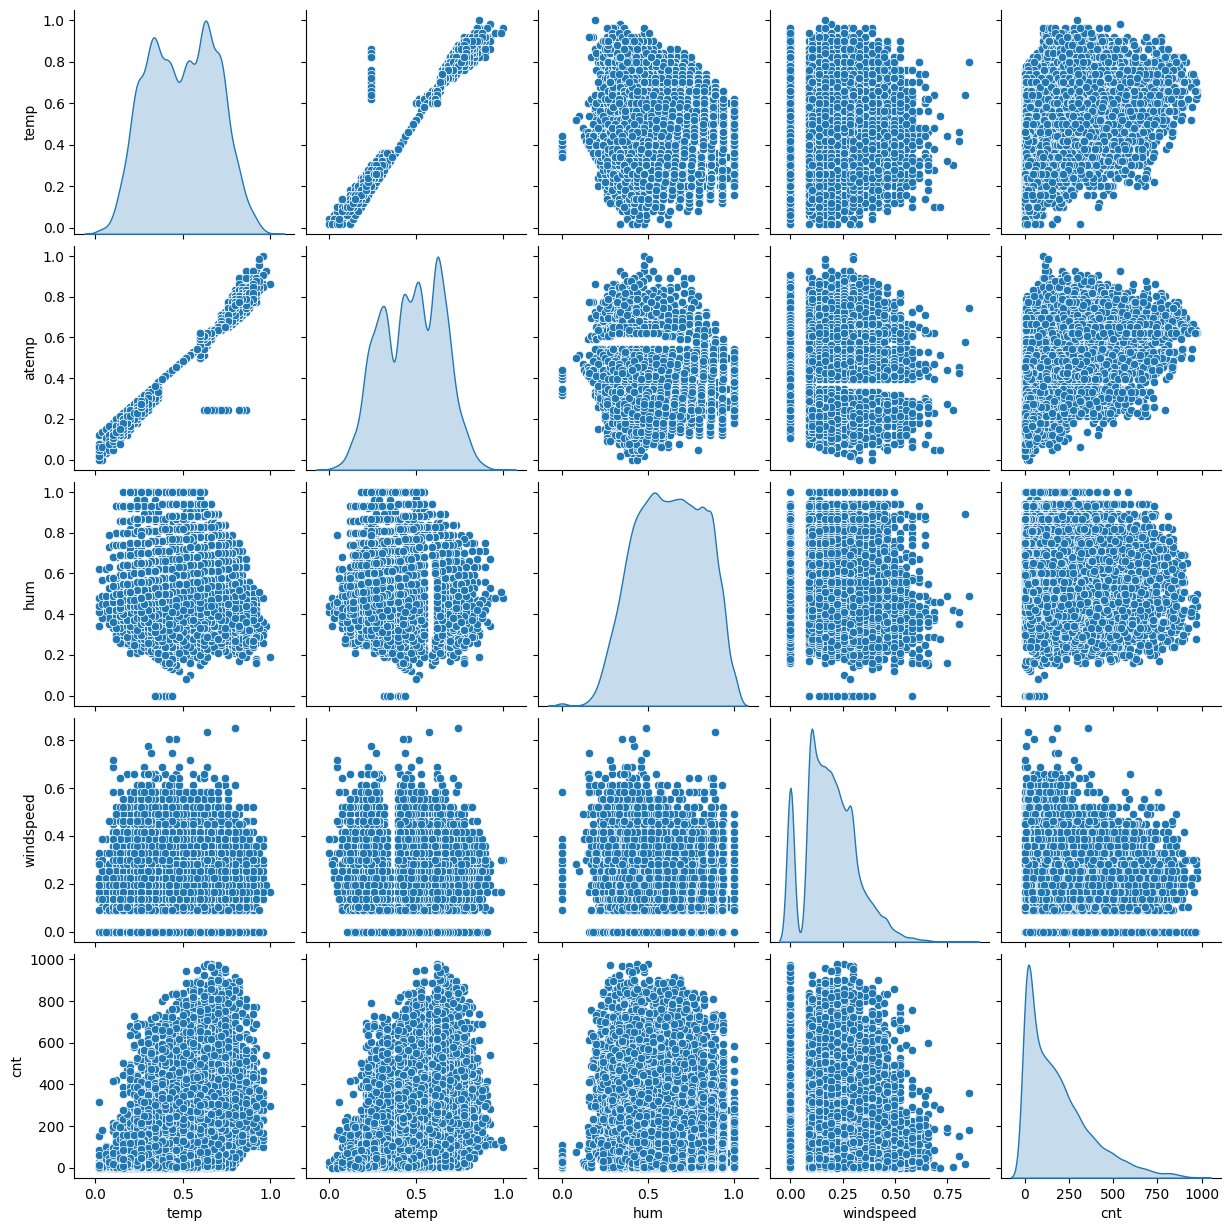

In [20]:
df_numeric = df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(data=df_numeric, diag_kind='kde')

In [21]:
import sklearn.model_selection


ts_cv = sklearn.model_selection.TimeSeriesSplit(n_splits=5)

In [22]:
y = df_copy['cnt']
X = df_copy.drop('cnt', axis=1)

In [23]:
all_splits = list(ts_cv.split(X, y))
train_idx, test_idx = all_splits[4]

In [32]:
x_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]
x_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]


In [24]:
import sklearn.linear_model
ridge = sklearn.linear_model.RidgeCV(cv=ts_cv, alphas=[0.1, 1.0, 10.0])

In [25]:
result = ridge.fit(X.iloc[train_idx], y.iloc[train_idx])
result.score(X.iloc[test_idx], y.iloc[test_idx])

0.6200128251301156

In [31]:
from sklearn.svm import SVR

svr = SVR()
parameters = {'kernel': ["linear", "rbf"],
              'C': [1.0, 3.0, 5.0, 8.0, 10.0],
              'epsilon': [0.0, 0.025, 0.05, 0.075, 0.1],
              'gamma' : ['scale', 'auto']}
grid = GridSearchCV(svr, parameters, cv=ts_cv,n_jobs=-1)
grid.fit(X.iloc[train_idx], y.iloc[train_idx])
grid.score(X.iloc[test_idx], y.iloc[test_idx])




0.5660956933479382

# Ignore for Now. Not done yet

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV

# Define a function to create and train the model
def create_model(input_dim, optimizer):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define the parameter grid for GridSearchCV
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128]
}

# Create the model
model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, input_dim=input_dim)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=ts_cv)


# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the test data
test_score = best_model.score(X_test, y_test)

ModuleNotFoundError: No module named 'tensorflow.python'